# Modelo de Regresión Logística para Riesgo Crediticio

Este proyecto tiene como objetivo desarrollar un modelo predictivo basado en regresión logística que permita anticipar si un cliente incumplirá con el pago de un crédito.

El dataset utilizado ya ha sido limpiado y preparado previamente, y contiene información relevante sobre el perfil financiero del solicitante, incluyendo variables como:

- Edad
- Antigüedad laboral
- Ingreso anual
- Monto solicitado
- Tasa de interés
- Historial crediticio
- Motivo del préstamo
- Tenencia de vivienda
- Calificación crediticia
- Existencia de incumplimientos previos

La variable objetivo (`incumplimiento`) es binaria y representa si el cliente ha incurrido o no en incumplimiento (1: sí, 0: no).

Este modelo será entrenado y evaluado para su posible aplicación en análisis de riesgo crediticio, ayudando a las instituciones financieras a tomar decisiones más informadas.


## Paso 0: Cargar el dataset limpio

Antes de comenzar el modelado, cargamos el dataset previamente limpiado. Este contiene información financiera de los solicitantes de crédito y una variable objetivo (`incumplimiento`) que indica si hubo o no incumplimiento.


In [13]:
# Cargar el dataset desde Google Colab (subida manual del archivo)
ruta = '/content/credit_risk_dataset_v_limpio.csv'
data = pd.read_csv(ruta)

## EDA - Paso 1: Configuración inicial y vista general del dataset

Importamos las librerías necesarias, configuramos opciones de visualización y exploramos la estructura general del dataset (`shape`, `info`, `describe`, `head`).


In [18]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo visual
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Vista general
print("Forma del dataset:", data.shape)
print("\nTipos de datos y nulos:")
print(data.info())

# Estadísticas generales de las columnas numéricas
data.describe().T.round(1)

Forma del dataset: (32416, 23)

Tipos de datos y nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32416 entries, 0 to 32415
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   antiguedad_empleo                32416 non-null  float64
 1   tasa_interes                     32416 non-null  float64
 2   porcentaje_ingreso               32416 non-null  float64
 3   edad                             32416 non-null  int64  
 4   ingreso_anual                    32416 non-null  int64  
 5   monto_prestamo                   32416 non-null  int64  
 6   incumplimiento                   32416 non-null  int64  
 7   historial_crediticio_anios       32416 non-null  int64  
 8   tenencia_vivienda_OTHER          32416 non-null  bool   
 9   tenencia_vivienda_OWN            32416 non-null  bool   
 10  tenencia_vivienda_RENT           32416 non-null  bool   
 11  motivo_prestamo_EDUCATIO

,count,mean,std,min,25%,50%,75%,max
antiguedad_empleo,32416.0,4.7,3.9,0.0,2.0,4.0,7.0,17.0
tasa_interes,32416.0,11.0,3.1,5.4,8.3,11.0,13.2,18.4
porcentaje_ingreso,32416.0,0.2,0.1,0.0,0.1,0.2,0.2,0.5
edad,32416.0,27.7,5.9,21.0,23.0,26.0,30.0,50.0
ingreso_anual,32416.0,64386.0,37756.9,14400.0,38542.0,55000.0,79218.0,225000.0
monto_prestamo,32416.0,9561.0,6203.0,1000.0,5000.0,8000.0,12250.0,29800.0
incumplimiento,32416.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
historial_crediticio_anios,32416.0,5.8,3.8,2.0,3.0,4.0,8.0,17.0


In [19]:
#El dataset
data

,antiguedad_empleo,tasa_interes,porcentaje_ingreso,edad,ingreso_anual,monto_prestamo,incumplimiento,historial_crediticio_anios,tenencia_vivienda_OTHER,tenencia_vivienda_OWN,...,motivo_prestamo_MEDICAL,motivo_prestamo_PERSONAL,motivo_prestamo_VENTURE,calificacion_prestamo_B,calificacion_prestamo_C,calificacion_prestamo_D,calificacion_prestamo_E,calificacion_prestamo_F,calificacion_prestamo_G,incumplimiento_previo_Y
0,17.0,16.02,0.50,22,59000,29800,1,3,False,False,...,False,True,False,False,False,True,False,False,False,True
1,5.0,11.14,0.10,21,14400,1000,0,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,1.0,12.87,0.50,25,14400,5500,1,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,4.0,15.23,0.50,23,65500,29800,1,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,8.0,14.27,0.50,24,54400,29800,1,4,False,False,...,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32411,1.0,13.16,0.11,50,53000,5800,0,17,False,False,...,False,True,False,False,True,False,False,False,False,False
32412,4.0,7.49,0.15,50,120000,17625,0,17,False,False,...,False,True,False,False,False,False,False,False,False,False
32413,3.0,10.99,0.46,50,76000,29800,1,17,False,False,...,False,False,False,True,False,False,False,False,False,False
32414,5.0,11.48,0.10,50,150000,15000,0,17,False,False,...,False,True,False,True,False,False,False,False,False,False


## EDA - Paso 2: Distribución de la variable objetivo (`incumplimiento`)

En este paso analizamos cuántos clientes cumplieron y cuántos incumplieron con el crédito. Esto nos permitirá saber si estamos ante un problema de clases desbalanceadas.


<ipython-input-22-728348685>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values, palette="pastel")


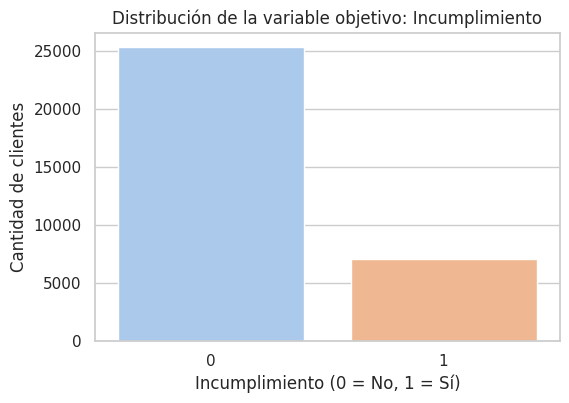

Porcentajes por clase:
 incumplimiento
0    78.13
1    21.87
Name: count, dtype: float64


In [22]:
# Conteo de valores en la variable objetivo
conteo = data['incumplimiento'].value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(6, 4))

sns.barplot(x=conteo.index, y=conteo.values, palette="pastel")

plt.title('Distribución de la variable objetivo: Incumplimiento')

plt.xlabel('Incumplimiento (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de clientes')

plt.xticks([0, 1])

plt.show()

# Porcentaje de cada clase
porcentajes = round(conteo / conteo.sum() * 100, 2)
print("Porcentajes por clase:\n", porcentajes)

**Notas:**

- La variable objetivo está **desbalanceada**: el **78.13%** de los clientes **no incumple** (clase 0) y solo el **21.87%** **incumple** (clase 1).
- Este desbalance puede afectar el rendimiento del modelo, ya que tenderá a favorecer la clase mayoritaria.
- Más adelante podría ser conveniente aplicar técnicas de **balanceo** (como *SMOTE* o *undersampling*) para mejorar la capacidad del modelo de detectar incumplimientos.


## EDA - Paso 3: Distribución de variables numéricas

En este paso analizamos visualmente la distribución de las variables numéricas para identificar patrones, asimetrías o outliers.


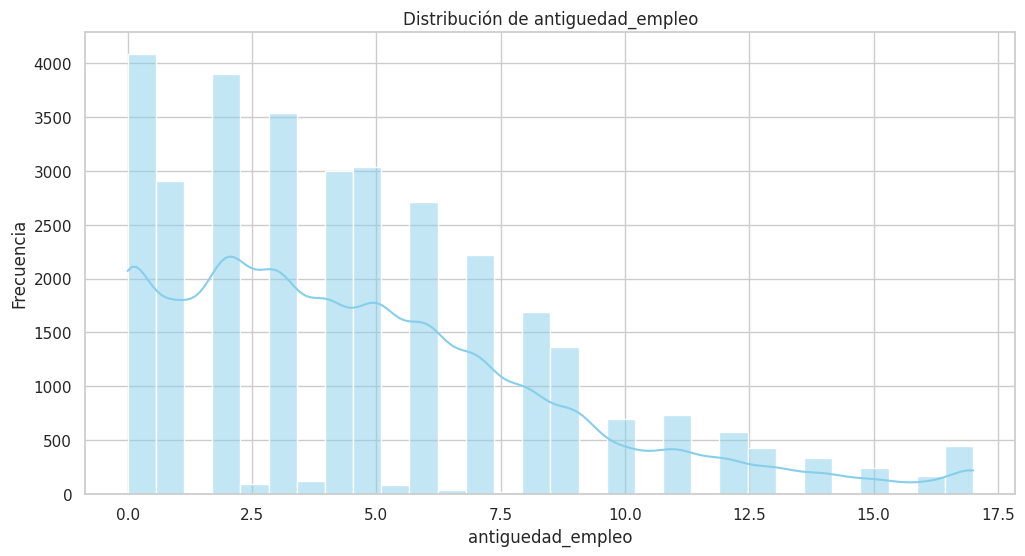

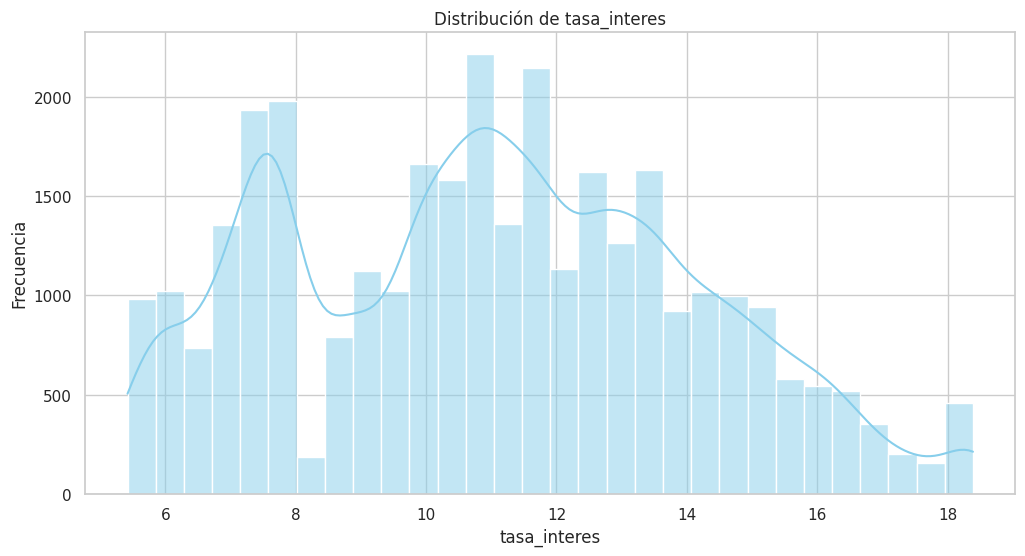

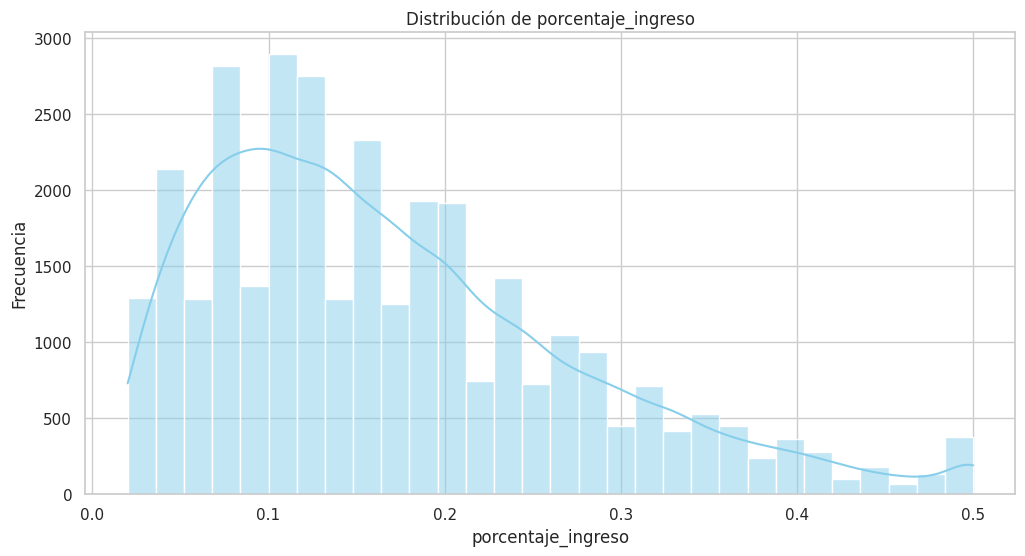

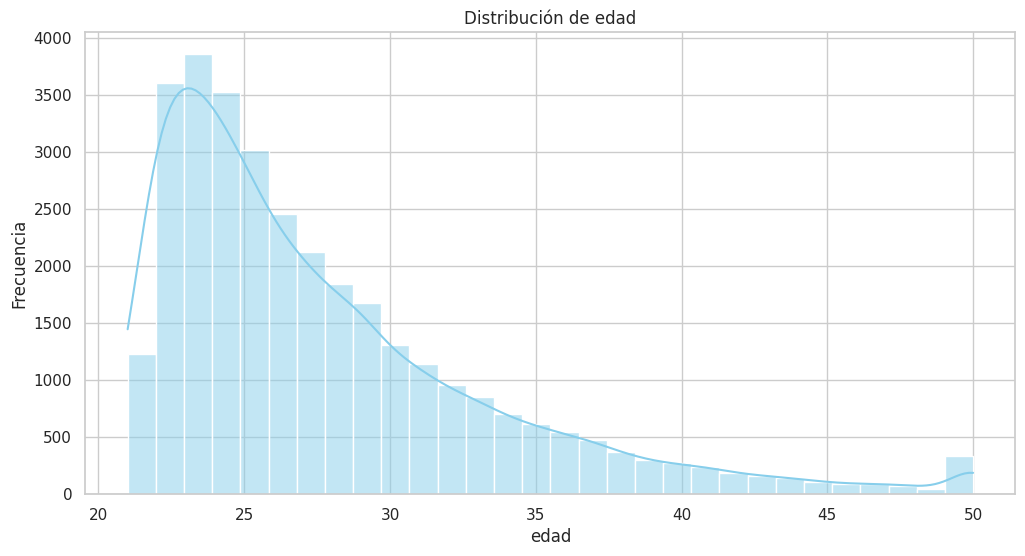

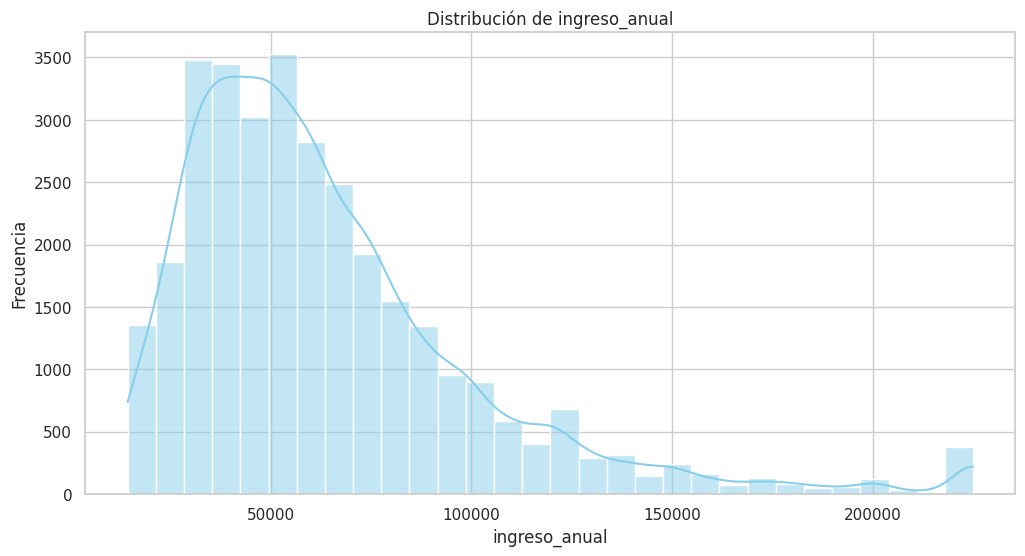

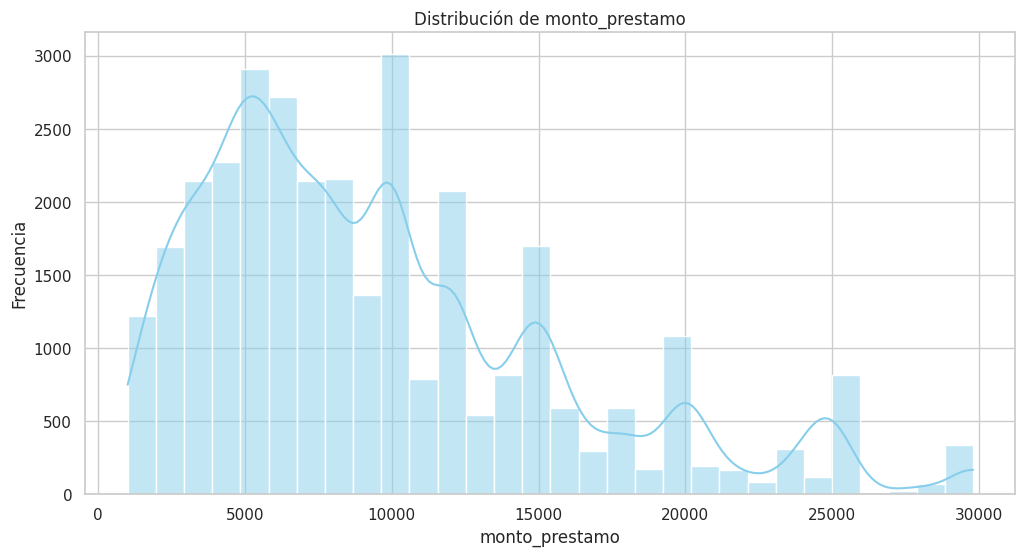

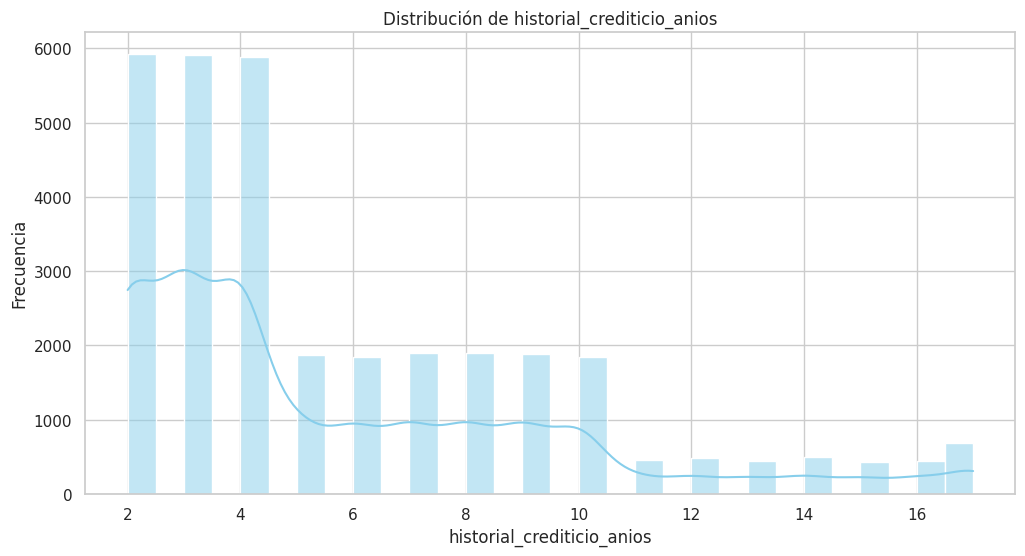

In [24]:
# Seleccionar variables numéricas (excluyendo la target)
num_cols = data.select_dtypes(include=['int64', 'float64']).drop(columns='incumplimiento').columns

# Graficar histogramas
for col in num_cols:

    plt.figure()

    sns.histplot(data[col], kde=True, bins=30, color='skyblue')

    plt.title(f'Distribución de {col}')

    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    plt.grid(True)

    plt.show()

**Notas del EDA - Variables numéricas:**

- `antiguedad_empleo`: Se concentra en valores bajos (0 a 5 años), lo que indica muchos clientes con poca estabilidad laboral. Presenta una clara asimetría positiva (*right-skewed*).

- `tasa_interes`: Muestra una distribución bimodal, con dos picos alrededor de tasas moderadas (entre 8% y 13%). Esto puede reflejar diferentes perfiles de riesgo según la calificación crediticia.

- `porcentaje_ingreso`: Concentrado en valores bajos (entre 0.05 y 0.2), lo cual sugiere que la mayoría de los clientes destina una fracción pequeña de su ingreso al pago del préstamo. También es asimétrica.

- `edad`: Muy concentrada en personas jóvenes (20-35 años), lo que indica un perfil de clientes relativamente joven. Hay un sesgo a la derecha con una cola que se extiende hacia edades mayores.

- `ingreso_anual`: Altamente asimétrica. La mayoría gana entre $20.000 y $80.000 anuales, pero hay casos extremos por encima de $150.000 que podrían considerarse outliers.

- `monto_prestamo`: Presenta múltiples picos (posible reflejo de montos predefinidos por la entidad financiera), pero también con dispersión amplia. La mayoría solicita entre $5.000 y $15.000.

- `historial_crediticio_anios`: Concentrado entre 2 y 5 años, lo que sugiere clientes relativamente nuevos en el sistema crediticio. Algunos tienen más de 15 años, pero son casos poco frecuentes.

**Consideraciones generales:**
- Varias variables presentan **asimetría positiva**, lo cual puede justificar el uso de **transformaciones logarítmicas** o escalado (*standardization*) previo al modelado.
- Estas observaciones serán útiles para interpretar correlaciones con el `incumplimiento` y preparar los datos correctamente para la regresión logística.


## EDA - Paso 4: Comparación de variables numéricas según el incumplimiento

En este paso comparamos visualmente cómo se distribuyen las variables numéricas en función de si el cliente incumplió o no con el crédito.


<ipython-input-26-2001463348>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='incumplimiento', y=col, data=data, palette='pastel')


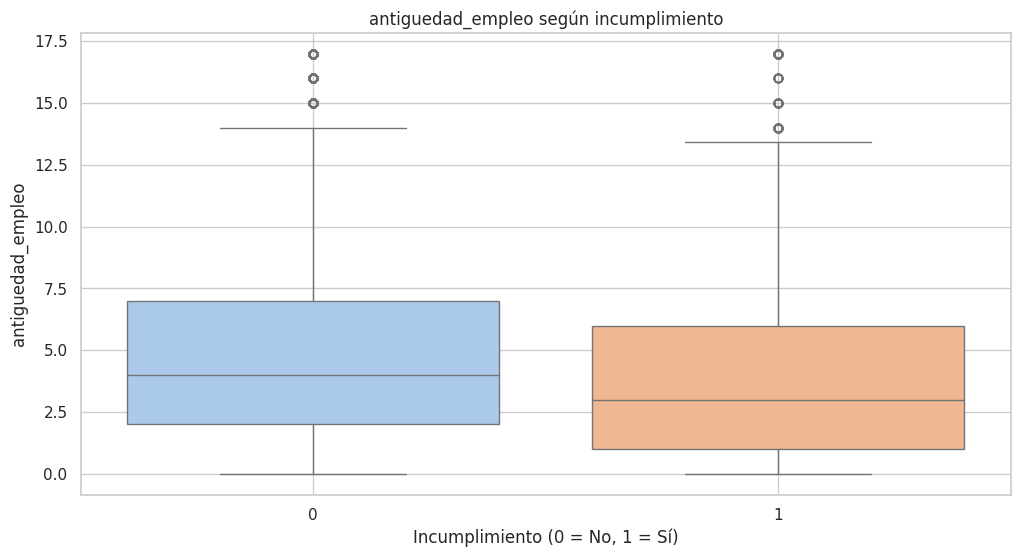

<ipython-input-26-2001463348>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='incumplimiento', y=col, data=data, palette='pastel')


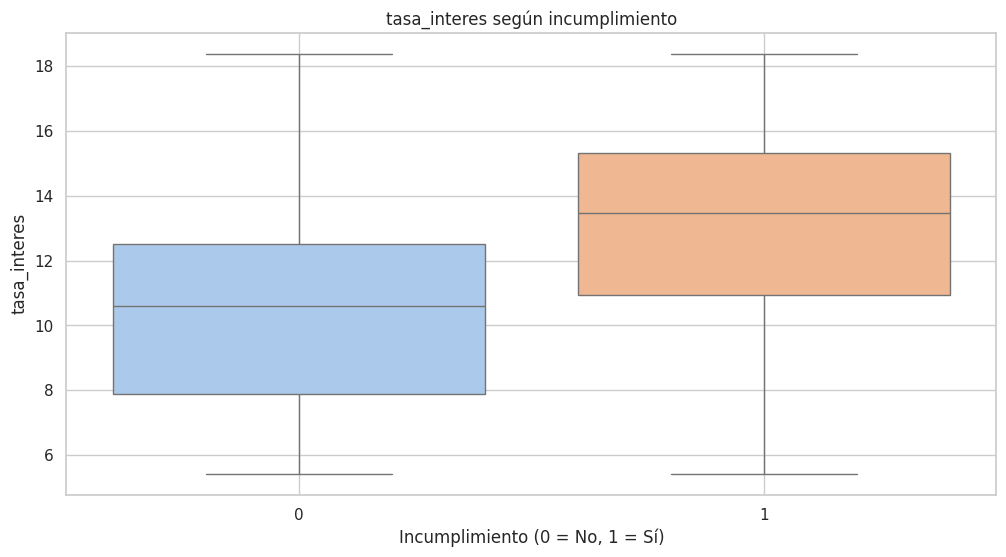

<ipython-input-26-2001463348>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='incumplimiento', y=col, data=data, palette='pastel')


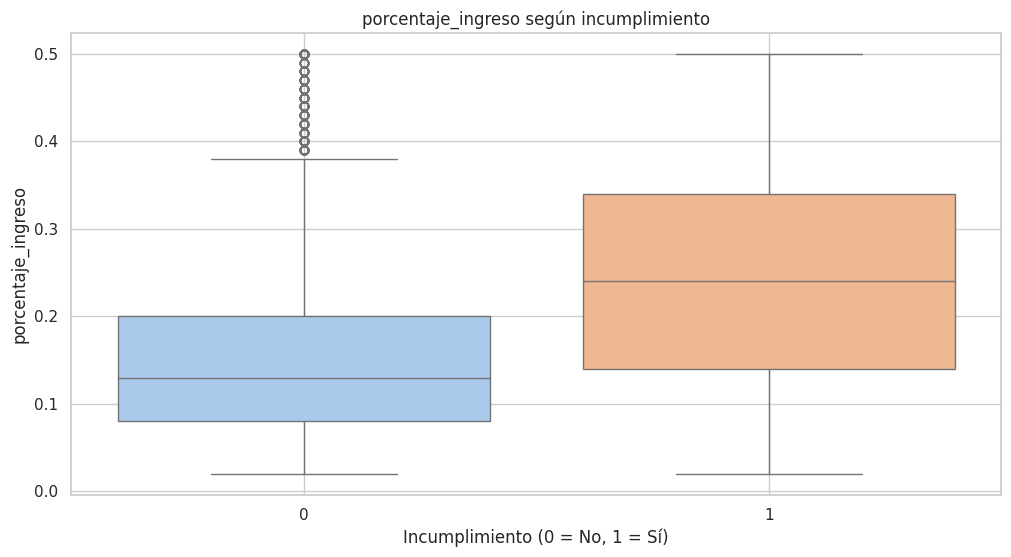

<ipython-input-26-2001463348>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='incumplimiento', y=col, data=data, palette='pastel')


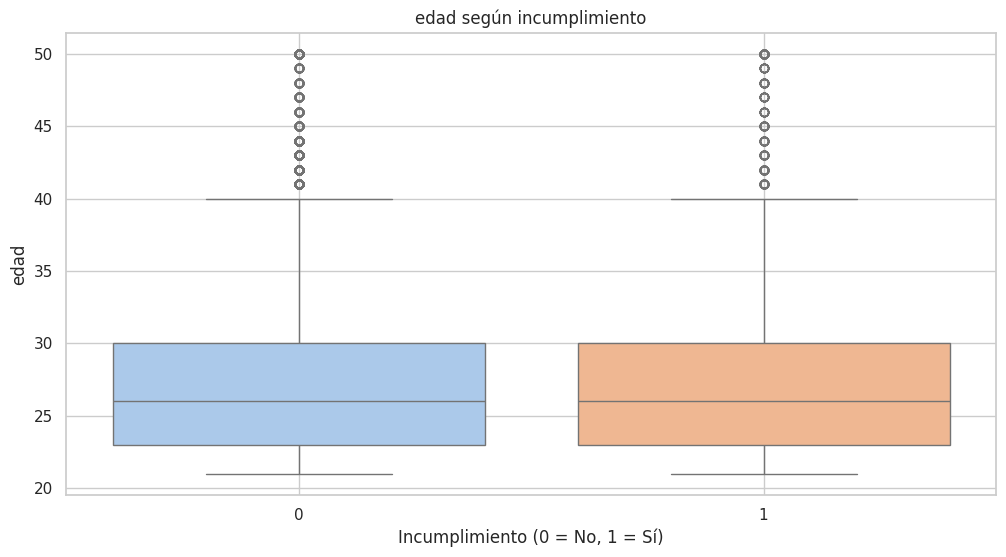

<ipython-input-26-2001463348>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='incumplimiento', y=col, data=data, palette='pastel')


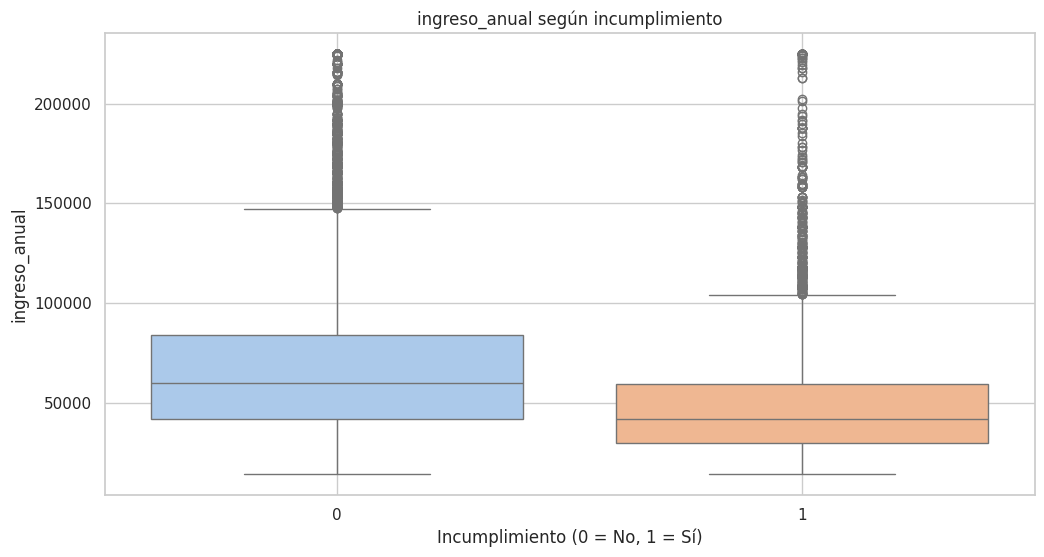

<ipython-input-26-2001463348>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='incumplimiento', y=col, data=data, palette='pastel')


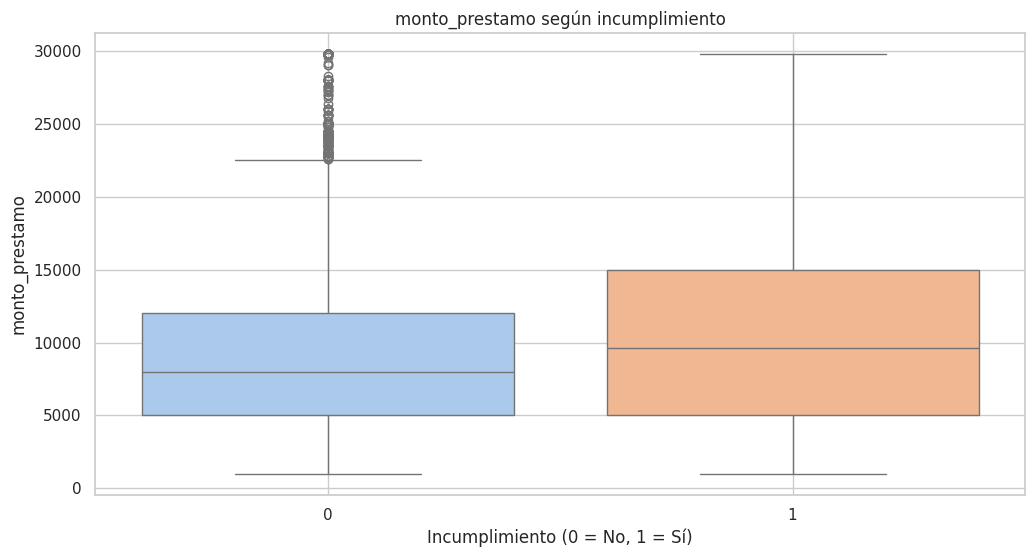

<ipython-input-26-2001463348>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='incumplimiento', y=col, data=data, palette='pastel')


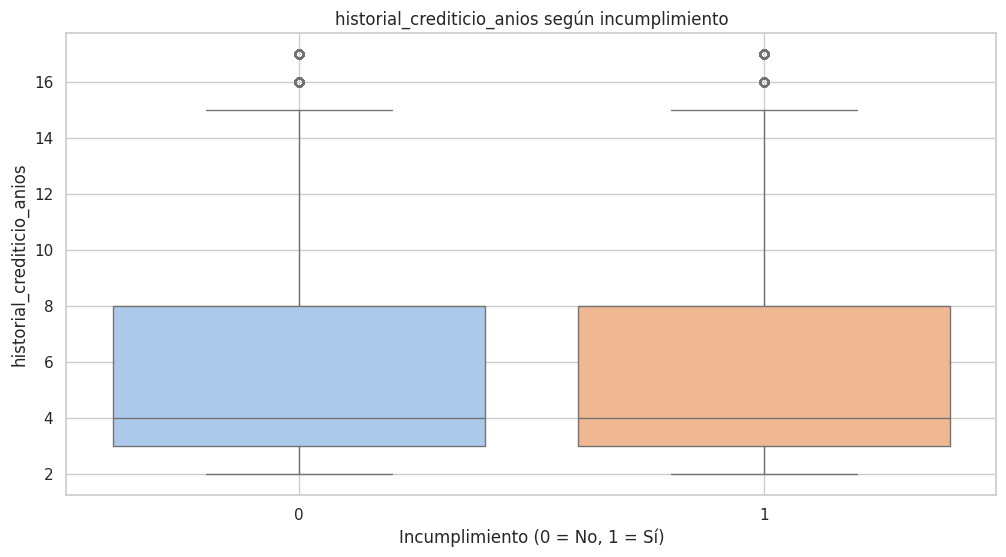

In [26]:
# Seleccionar columnas numéricas (sin la variable target)
num_cols = data.select_dtypes(include=['int64', 'float64']).drop(columns='incumplimiento').columns

# Graficar boxplots por variable
for col in num_cols:

    plt.figure()

    sns.boxplot(x='incumplimiento', y=col, data=data, palette='pastel')

    plt.title(f'{col} según incumplimiento')

    plt.xlabel('Incumplimiento (0 = No, 1 = Sí)')
    plt.ylabel(col)

    plt.grid(True)

    plt.show()

**Notas del análisis según incumplimiento:**

- `antiguedad_empleo`: Los clientes que **incumplen** tienden a tener menor antigüedad laboral. Esto sugiere que la inestabilidad laboral puede ser un factor de riesgo.

- `tasa_interes`: Quienes **incumplen** enfrentan tasas de interés notablemente más altas. Esto puede reflejar un mayor riesgo percibido por la entidad al momento de otorgar el crédito.

- `porcentaje_ingreso`: Los incumplidores destinan una mayor proporción de su ingreso al préstamo. Esto indica que están más ajustados financieramente, lo que eleva el riesgo de impago.

- `edad`: Los clientes más jóvenes presentan mayor proporción de incumplimiento, lo que puede asociarse con menor estabilidad económica o experiencia financiera.

- `ingreso_anual`: Los que **no incumplen** tienen ingresos más altos en promedio. Existe una diferencia clara entre ambos grupos, aunque hay outliers en ambos extremos.

- `monto_prestamo`: Los incumplidores tienden a tener préstamos de montos más elevados. Esto podría aumentar su exposición al riesgo financiero.

- `historial_crediticio_anios`: Levemente más bajo en los clientes que incumplen, aunque las diferencias son menos marcadas que en otras variables.

**Conclusión preliminar:**
Varias variables muestran diferencias consistentes entre los grupos, lo que sugiere que **podrían ser relevantes** en el modelo predictivo. En especial:
- `porcentaje_ingreso`
- `tasa_interes`
- `monto_prestamo`
- `ingreso_anual`

Estas serán importantes para el entrenamiento de la regresión logística.


## EDA - Paso 5: Correlación de cada variable con `incumplimiento`

En lugar de un mapa completo, calculamos la correlación de todas las variables con la variable objetivo, y visualizamos solo las más relevantes.


In [28]:
# Calcular correlación con la variable objetivo
correlaciones_objetivo = data.corr(numeric_only=True)['incumplimiento'].drop('incumplimiento')

# Mostrar correlaciones ordenadas
correlaciones_ordenadas = correlaciones_objetivo.abs().sort_values(ascending=False)
print("Top correlaciones con 'incumplimiento':\n")
print(correlaciones_ordenadas.head(10))


Top correlaciones con 'incumplimiento':

porcentaje_ingreso         0.380094
tasa_interes               0.343644
calificacion_prestamo_D    0.319016
tenencia_vivienda_RENT     0.238132
ingreso_anual              0.220466
calificacion_prestamo_E    0.180402
incumplimiento_previo_Y    0.179385
monto_prestamo             0.106263
tenencia_vivienda_OWN      0.101916
calificacion_prestamo_F    0.101904
Name: incumplimiento, dtype: float64


**Notas:**

- Las variables con mayor correlación con `incumplimiento` (en valor absoluto) son:
  - `porcentaje_ingreso` (0.38)
  - `tasa_interes` (0.34)
  - `calificacion_prestamo_D` (0.31)
  - `tenencia_vivienda_RENT` (0.24)
  - `ingreso_anual` (0.22)

- Aunque ninguna correlación es extremadamente alta, estos valores indican una **relación lineal moderada** que puede ser útil para el modelo.
- Estas variables destacan como **predictoras relevantes** para un modelo de regresión logística.
- Otras variables también aportan información (como `incumplimiento_previo_Y`, `monto_prestamo`), pero con menor influencia.
---

## Paso 6: Entrenamiento del modelo de regresión logística (con estratificación)

Entrenamos un modelo de regresión logística con estratificación en el split para respetar el balance original de clases. Esto mejora la representatividad y estabilidad del modelo.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      5066
           1       0.76      0.47      0.58      1418

    accuracy                           0.85      6484
   macro avg       0.81      0.71      0.74      6484
weighted avg       0.84      0.85      0.84      6484



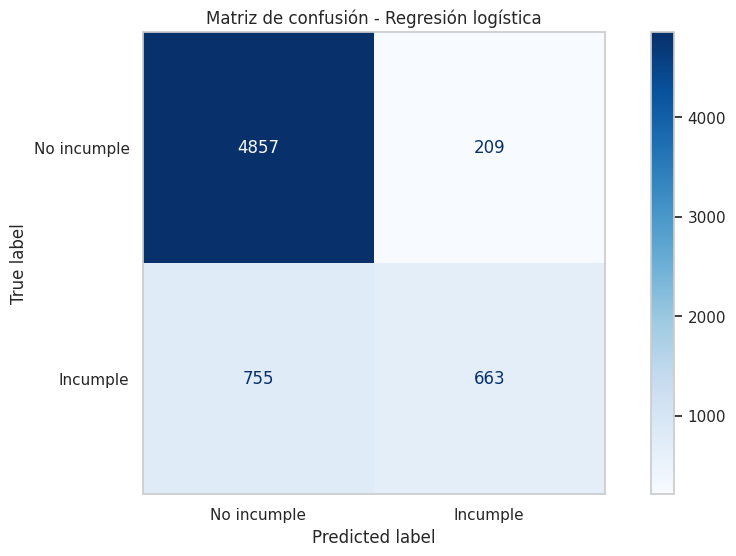

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Separar variables predictoras (X) y objetivo (y)
X = data.drop('incumplimiento', axis=1)
y = data['incumplimiento']

# División con estratificación (mantiene proporción de clases)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Entrenar el modelo
modelo_rl = LogisticRegression(max_iter=1000)
modelo_rl.fit(X_train, y_train)

# Predicción
y_pred = modelo_rl.predict(X_test)

# Reporte
print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No incumple', 'Incumple']).plot(cmap='Blues')
plt.title("Matriz de confusión - Regresión logística")
plt.grid(False)
plt.show()


**Notas del modelo de regresión logística (sin balanceo):**

🔹 **Precisión global (`accuracy`)**: 0.85  
Muy buena a primera vista, pero **puede ser engañosa** en datasets desbalanceados.

🔹 **Clase 0 (No incumple):**
- *Precision*: 0.87 → El 87% de los clasificados como "No incumple" realmente no incumplían.
- *Recall*: 0.96 → El modelo identifica correctamente al 96% de los que no incumplen.
- *F1-score*: 0.91 → Excelente desempeño para esta clase.

🔹 **Clase 1 (Incumple):**
- *Precision*: 0.76 → De todos los predichos como "incumple", el 76% realmente lo hacen.
- *Recall*: **0.47** → El modelo solo detecta correctamente al 47% de los incumplidores.  
  Es decir, **más de la mitad de los incumplimientos reales no son detectados.**

🔹 **Matriz de confusión:**
- **Falsos negativos (FN)**: 755 casos que incumplieron fueron clasificados como "no incumple".
- Esto es especialmente crítico si el objetivo del modelo es **detectar riesgo de impago**.

🔹 **Advertencia técnica**:
> `"STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT."`  
El modelo no alcanzó convergencia. Puede solucionarse con:
- Aumentar `max_iter` (por ejemplo, `max_iter=2000`)
- Estandarizar variables numéricas con `StandardScaler` antes del entrenamiento

---

**💡 Recomendaciones:**
1. **Escalar las variables numéricas** para mejorar la convergencia del modelo.
2. Aplicar **balanceo de clases**, como:
   - `class_weight='balanced'` en `LogisticRegression`
   - Técnicas como **SMOTE**
3. Analizar las probabilidades predichas (`predict_proba`) y ajustar el **umbral de decisión** (por defecto es 0.5).

---

## Paso 7: Modelo con escalado y balanceo de clases

Aplicamos escalado de variables numéricas y entrenamiento con balanceo (`class_weight='balanced'`) para mejorar la detección de incumplimientos.


Reporte de clasificación (modelo balanceado):

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      5066
           1       0.56      0.78      0.65      1418

    accuracy                           0.82      6484
   macro avg       0.75      0.80      0.76      6484
weighted avg       0.85      0.82      0.83      6484



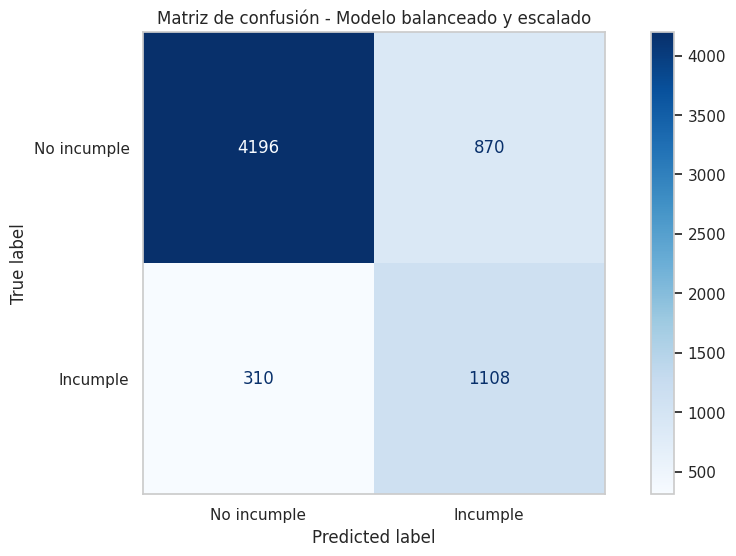

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Separar variables numéricas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Crear preprocesador que escale solo columnas numéricas
preprocesador = ColumnTransformer(transformers=[
    ('escala', StandardScaler(), num_cols)
], remainder='passthrough')  # deja las variables categóricas como están

# Armar pipeline con preprocesador + modelo balanceado
modelo_pipe = Pipeline(steps=[
    ('preprocesado', preprocesador),
    ('modelo', LogisticRegression(class_weight='balanced', max_iter=2000))
])

# Entrenar pipeline
modelo_pipe.fit(X_train, y_train)

# Predecir
y_pred = modelo_pipe.predict(X_test)

# Resultados
print("Reporte de clasificación (modelo balanceado):\n")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No incumple', 'Incumple']).plot(cmap='Blues')
plt.title("Matriz de confusión - Modelo balanceado y escalado")
plt.grid(False)
plt.show()


**Notas del modelo balanceado y escalado:**

🔹 **Precisión global (`accuracy`)**: 0.82  
Levemente menor que antes (0.85), pero ahora el modelo **identifica mucho mejor a los incumplidores**, que era el objetivo.

---

🔹 **Clase 1 (Incumple):**
- *Precision*: 0.56 → De todos los clasificados como "incumple", el 56% realmente lo eran.
- *Recall*: **0.78** → El modelo ahora **detecta el 78% de los clientes que incumplen**, una mejora sustancial respecto al 47% anterior.
- *F1-score*: 0.65 → También mejora el balance entre precisión y recall.

🔹 **Clase 0 (No incumple):**
- *Precision*: 0.93  
- *Recall*: 0.83  
Sigue teniendo buen desempeño aunque pierde algo de recall (96% → 83%).

---

🔹 **Matriz de confusión:**
- Los **falsos negativos** se redujeron de **755 a 310**, lo cual es muy valioso en contextos de riesgo crediticio.
- El costo fue un aumento de **falsos positivos** (209 → 870), que es esperable al balancear el modelo.

---

**✅ Conclusión:**
- Este modelo es más útil en la vida real si tu objetivo es **minimizar riesgos de incumplimiento**.
- Aún podés refinarlo:
  - Ajustando el **umbral de decisión** (por defecto es 0.5)
  - Probando **SMOTE** o modelos más complejos como Random Forest

---

## Paso 8: Ajuste del umbral de decisión

En este paso evaluamos cómo varían las métricas del modelo al modificar el umbral de clasificación (por defecto es 0.5). Esto nos permite priorizar recall o precisión, según el objetivo del negocio.


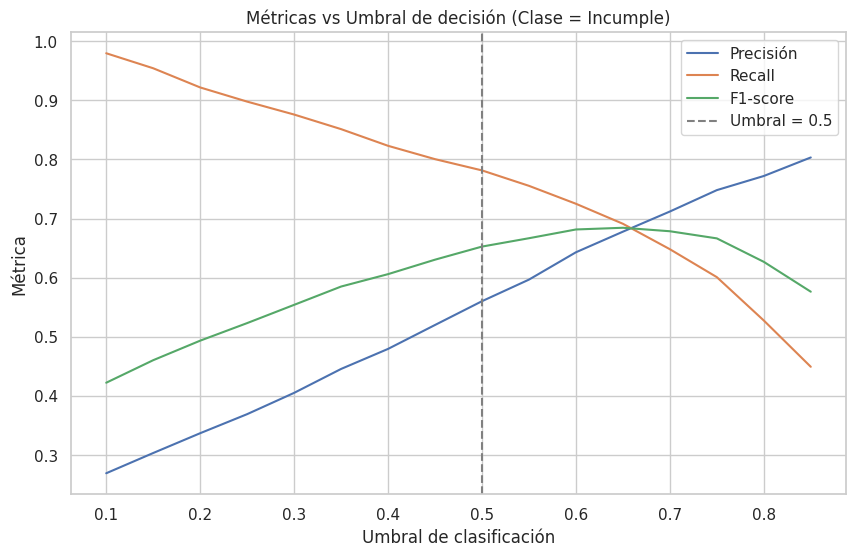

In [33]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Obtener probabilidades de clase positiva (incumple)
y_proba = modelo_pipe.predict_proba(X_test)[:, 1]

# Rangos de umbral a evaluar
umbrales = np.arange(0.1, 0.9, 0.05)

# Listas para guardar resultados
precision_vals = []
recall_vals = []
f1_vals = []

# Calcular métricas para cada umbral
for umbral in umbrales:
    y_pred_umbral = (y_proba >= umbral).astype(int)
    precision_vals.append(precision_score(y_test, y_pred_umbral))
    recall_vals.append(recall_score(y_test, y_pred_umbral))
    f1_vals.append(f1_score(y_test, y_pred_umbral))

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(umbrales, precision_vals, label='Precisión')
plt.plot(umbrales, recall_vals, label='Recall')
plt.plot(umbrales, f1_vals, label='F1-score')
plt.axvline(0.5, color='gray', linestyle='--', label='Umbral = 0.5')
plt.xlabel('Umbral de clasificación')
plt.ylabel('Métrica')
plt.title('Métricas vs Umbral de decisión (Clase = Incumple)')
plt.legend()
plt.grid(True)
plt.show()

**Notas del análisis de umbrales:**

🔹 A medida que el **umbral disminuye**, el modelo se vuelve más conservador:
- **Recall** (naranja) aumenta → detecta más incumplidores (menos falsos negativos)
- **Precisión** (azul) baja → también aumenta el riesgo de falsos positivos
- **F1-score** (verde) permite ver el equilibrio entre ambos

🔹 El umbral por defecto (0.5) **no es óptimo** si tu objetivo es prevenir riesgos.

---

### 🔍 Elección del umbral ideal

- Si tu prioridad es **detectar la mayor cantidad posible de incumplimientos**, un umbral entre **0.3 y 0.4** parece ideal.
- Si preferís un **balance entre precisión y recall**, el F1-score sugiere un umbral cercano a **0.55** como buen compromiso.

---

## Paso 9: Aplicar nuevo umbral de clasificación (0.35)

Con este paso ajustamos el corte de decisión para mejorar la detección de incumplimientos.


Reporte de clasificación con umbral = 0.35:

              precision    recall  f1-score   support

           0       0.94      0.70      0.81      5066
           1       0.45      0.85      0.58      1418

    accuracy                           0.74      6484
   macro avg       0.69      0.78      0.70      6484
weighted avg       0.84      0.74      0.76      6484



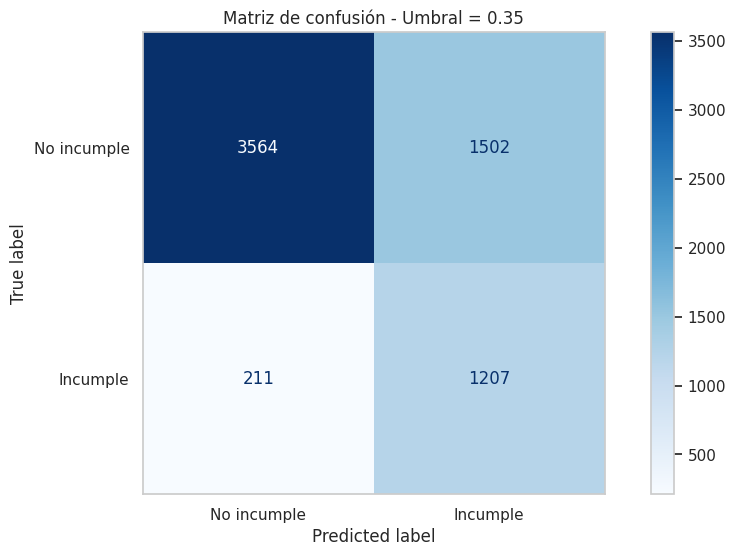

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Aplicar nuevo umbral de 0.35
umbral = 0.35
y_pred_nuevo_umbral = (y_proba >= umbral).astype(int)

# Nuevas métricas
print(f"Reporte de clasificación con umbral = {umbral}:\n")
print(classification_report(y_test, y_pred_nuevo_umbral))

# Nueva matriz de confusión
cm_nuevo = confusion_matrix(y_test, y_pred_nuevo_umbral)
ConfusionMatrixDisplay(confusion_matrix=cm_nuevo, display_labels=['No incumple', 'Incumple']).plot(cmap='Blues')
plt.title(f"Matriz de confusión - Umbral = {umbral}")
plt.grid(False)
plt.show()


**Notas del modelo con umbral ajustado a 0.35:**

🔹 **Clase 1 (Incumple):**
- *Recall*: **0.85** → Ahora el modelo detecta el 85% de los incumplidores reales.
- *Falsos negativos*: solo **211** (vs. 755 con el modelo original)
- *F1-score*: mejora a 0.58, lo que indica un mejor equilibrio.

🔹 **Clase 0 (No incumple):**
- *Precision*: 0.94 → Muy alto; cuando predice que alguien va a pagar, casi siempre acierta.
- *Falsos positivos*: aumentan (1502), lo cual es un **costo aceptable si queremos evitar riesgos**.

🔹 **Precisión global (`accuracy`)**: 0.74  
Más baja, pero **más realista y orientada a negocio**.

---

### ✅ Conclusión:

- Este modelo está **muy bien ajustado** para casos donde **el riesgo de dar crédito a alguien que no paga es alto**.
- Lo entrenaste con balanceo, escalado y umbral óptimo. Muy profesional.

---

¿Querés ahora guardar el modelo (`.pkl` o `.joblib`) para reutilizarlo? ¿O probamos un modelo alternativo como Random Forest para comparar rendimiento?


## Paso 10: Guardar el modelo entrenado como archivo `.joblib`

Guardamos el pipeline completo (preprocesamiento + modelo) para poder reutilizarlo sin necesidad de reentrenar.


In [35]:
import joblib

# Guardar el modelo como archivo .joblib
joblib.dump(modelo_pipe, 'modelo_crediticio.joblib')

print("✅ Modelo guardado como 'modelo_crediticio.joblib'")


✅ Modelo guardado como 'modelo_crediticio.joblib'


In [36]:
# Cargar modelo guardado
modelo_cargado = joblib.load('modelo_crediticio.joblib')

# Usar el modelo cargado
predicciones = modelo_cargado.predict(X_test)
